In [1]:
import csv
import math
import matplotlib.pyplot as plt
import random
import convexOQHNew
#from test_mainoquickhull import *
from pathlib import Path

In [2]:
def file_generator(number_of_files=20):
    #number_of_files = int(input("Enter number of files: "))
    data_folder = Path("Input/")
    for i in range(number_of_files):
        file_name = data_folder / (str(i) + ".csv")
        number_of_points = random.randint(80, 100)
        with open(file_name, mode="w") as file:
            for i in range(number_of_points):
                point = (random.uniform(0, 100), random.uniform(0, 100))
                file.write(str(point[0]) + ", " + str(point[1]) + "\n")
            #print("Finish")
            file.close()

In [3]:
def points_supplement(points):
    S = []
    for i in range(0, len(points) - 1):
        if points[i+1][0] > points[i][0] and points[i+1][1] > points[i][1]:
            p3 = (points[i][0], points[i+1][1])
            S.append([i+1, p3])
        elif points[i+1][0] > points[i][0] and points[i+1][1] < points[i][1]:
            p3 = (points[i+1][0], points[i][1])
            S.append([i+1, p3])
        elif points[i+1][0] < points[i][0] and points[i+1][1] < points[i][1]:
            p3 = (points[i][0], points[i+1]
                  [1])
            S.append([i+1, p3])
        elif points[i+1][0] < points[i][0] and points[i+1][1] > points[i][1]:
            p3 = (points[i+1][0], points[i][1])
            S.append([i+1, p3])
    return S

In [4]:
def graph(points, style, scale=1):
    ax = plt.subplot()
    for i in range(len(points)):
        ax.plot([point[0] for point in points[i]], [point[1] for point in points[i]], style[i])
    # Input points in blue
    # ax.plot([point[0] for point in points], [point[1] for point in points], style)
    # ax.plot([x[0] for x in input_points], [x[1] for x in input_points], 'y.')
    # ax.plot([x[0] for x in processed_points], [x[1] for x in processed_points], 'r.')

    # Orthogonal convex hull points in red
    # ax.plot([x[0] for x in processed_points], [x[1] for x in processed_points], 'b-')

    plt.ylabel('Y')
    plt.xlabel('X')
    ax.set_aspect(scale)

In [5]:
def orthogonalize(number_of_files=20):
    input_folder = Path("Input/")
    output_folder = Path("Output/")
    for i in range(number_of_files):
        input_file_name = input_folder / (str(i) + ".csv")
        output_file_name = output_folder / (str(i) + ".csv")
        output_graph_name = output_folder / (str(i) + ".png")
        input_points = []
        with open(input_file_name, "r") as input_file:
            csv_reader = csv.reader(input_file, delimiter=",")
            for row in csv_reader:
                #input_points.append[[float(row[0]), float(row[1])]]
                input_points.append([float(row[0]), float(row[1])])
            input_file.close()

        processed_points = convexOQHNew.findOrthogonalConvexHull(input_points)
        processed_points.append(processed_points[0])
        S = points_supplement(processed_points)
        for i in range(len(S)):
            processed_points.insert(S[i][0]+i, S[i][1])
        #processed_points.append(processed_points[0])

        with open(output_file_name, "w") as output_file:
            for point in processed_points:
                output_file.write(str(point[0]) + ", " + str(point[1]) + "\n")
            output_file.close()

        plt = graph(processed_points, input_points)
        plt.savefig(output_graph_name)
        plt.close()

In [6]:
def calculate_y(x):
    #return random.gauss(1, 0.5)*x + random.gauss(0,10)
    return random.gauss(0,50)

In [7]:
def redundancy_omission(lst):
    result = []
    result.append(lst[0])
    for i in range(1, len(lst)):
        if not lst[i] == lst[i-1]: 
            result.append(lst[i])
    return result

In [8]:
def dfs(u):
    global time, low, num, saveVertexesList, deleteVertexesList, dfsStack, adjacentMatrix, ans
    time += 1
    low[u] = time
    num[u] = time
    dfsStack.append(u)
    for v in adjacentMatrix[u]:
        if (num[v] == 0): #not visited
            dfs(v)
            low[u] = min(low[u],low[v])
        else:
            low[u] = min(low[u],num[v])
    if (low[u] == num[u]):
        saveVertexesList.clear()
        v = dfsStack.pop()
        while (v != u):
            saveVertexesList.append(v)
            v = dfsStack.pop()
        saveVertexesList.append(u)
        if (len(saveVertexesList) > 1):
            ans = saveVertexesList.copy()
        else:
            deleteVertexesList.append(saveVertexesList.pop())

def tarjan(graph):
    global time, low, num, saveVertexesList, deleteVertexesList, dfsStack, adjacentMatrix, ans

    modifiedGraph = list()
    for i in range(len(graph)-1):
        (x1, y1) = graph[i]
        (x2, y2) = graph[i+1]
        modifiedGraph.append((x1, y1))
        if (x1 == x2):
            for j in range(len(graph)):
                if (x1 == graph[j][0]):
                    if (y1 < graph[j][1] < y2) or (y2 < graph[j][1] < y1):
                        modifiedGraph.append((x1, graph[j][1]))
        if (y1 == y2):
            for j in range(len(graph)):
                if (y1 == graph[j][1]):
                    if (x1 < graph[j][0] < x2) or (x2 < graph[j][0] < x1):
                        modifiedGraph.append((graph[j][0], y1))
        modifiedGraph.append((x2, y2))

    vertexIndex = {modifiedGraph[0]:0} # dict to index vertexes
    reversedVertexIndexToPoint = [modifiedGraph[0]]
    for i in range(1,len(modifiedGraph)):
        if not (modifiedGraph[i] in vertexIndex.keys()):
            vertexIndex[modifiedGraph[i]] = len(vertexIndex)
            reversedVertexIndexToPoint.append(modifiedGraph[i])

    edgeSet = set()
    adjacentMatrix = [list() for i in range(len(vertexIndex))]
    for i in range(len(modifiedGraph)):
        (u, v) = (vertexIndex[modifiedGraph[i]], vertexIndex[modifiedGraph[(i+1)%len(modifiedGraph)]])
        if not ((u, v) in edgeSet):
            adjacentMatrix[u].append(v)
            edgeSet.add((v, u))

    num = [0] * len(vertexIndex)
    low = [len(vertexIndex)+1] * len(vertexIndex)
    dfsStack = []
    saveVertexesList = []
    deleteVertexesList = []
    time = 0
    dfs(0)
    listSavePoint = [reversedVertexIndexToPoint[i] for i in ans]
    listSavePoint.append(listSavePoint[0])
    listDeletePoint = [reversedVertexIndexToPoint[i] for i in deleteVertexesList]
    return (listSavePoint, listDeletePoint)

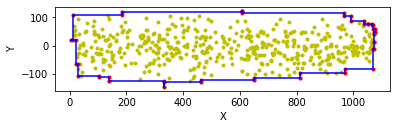

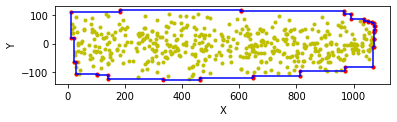

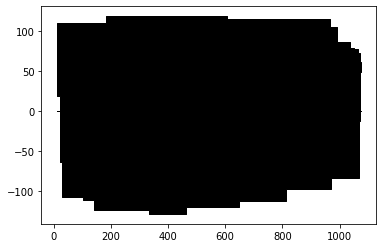

In [9]:
input_points = []
for _ in range(500):
    x = random.uniform(0, 1080)
    y = calculate_y(x)
    point = (int(x), int(y))
    input_points.append(point)
processed_points = convexOQHNew.findOrthogonalConvexHull(input_points)
processed_points.append(processed_points[0])
S = points_supplement(processed_points)    
for i in range(len(S)):
    processed_points.insert(S[i][0]+i, S[i][1])
processed_points = redundancy_omission(processed_points)

graph([input_points, processed_points, processed_points],
      style=['y.', 'r.', 'b-'], 
      scale=1)
plt.show()
plt.clf()
processed_points, deleted_points = tarjan(processed_points)

for point in deleted_points:
    input_points.remove(point)
    
graph([input_points, processed_points, processed_points],
      style=['y.', 'r.', 'b-'], 
      scale=1)
plt.show()
plt.clf()
plt.fill_between([point[0] for point in processed_points],
                       [point[1] for point in processed_points], color='black',
                      interpolate = False)
plt.show()

In [10]:
def isCollide(point_list, A, B):
	# Aim : To determine if line AB collides with any line created by point_list
	# Input: 
	#	point_list: list of point (x,y) 
	#	A,B: (x,y) of point A, point B
	# Output:
	# 	isCollide : Boolean value if there is collides of not
    IDENTICAL = -1
    VERTICAL = 0
    HORIZONTAL = 1
    OBLIQUE = 2     
    VERBOSE = False
    def relative_position(A, B):
        if A[0] != B[0] and A[1] != B[1]:
            return OBLIQUE
        elif A[0] == B[0] and A[1] != B[1]:
            return VERTICAL
        elif A[0] != B[0] and A[1] == B[1]:
            return HORIZONTAL
        else:
            return IDENTICAL
    def group_to_pairs(x_coordinates, y_coordinates, length):
        all_pairs_position = {
            VERTICAL: {},
            HORIZONTAL: {}
        }
        for i in range(0, length - 1):
            position = relative_position(
                (x_coordinates[i], y_coordinates[i]), (x_coordinates[i+1], y_coordinates[i+1]))
            if position == IDENTICAL or position == OBLIQUE:
                continue
            if position == VERTICAL:
                previous_value = all_pairs_position.get(VERTICAL).get(x_coordinates[i])
                update_value = [(y_coordinates[i], y_coordinates[i+1])]
                if previous_value != None:
                    update_value = previous_value + update_value
                all_pairs_position[VERTICAL][x_coordinates[i]] = update_value
            if position == HORIZONTAL:
                previous_value = all_pairs_position.get(HORIZONTAL).get(y_coordinates[i])
                update_value = [(x_coordinates[i], x_coordinates[i+1])]
                if previous_value != None:
                    update_value = previous_value + update_value
                all_pairs_position[HORIZONTAL][y_coordinates[i]] = update_value
        return all_pairs_position

    def in_range(value, range):
        if range[0] < value and value < range[1]:
            return True
        if range[1] < value and value < range[0]:
            return True
        return False
    x_coordinates = []
    y_coordinates = []
    length_list = len(point_list)
    for i in range(0, length_list):
        x_coordinates.append(point_list[i][0])
        y_coordinates.append(point_list[i][1])
    all_pairs_position = group_to_pairs(x_coordinates, y_coordinates, length_list)
    position = relative_position(A, B)
    is_collide = False
    if position == IDENTICAL or position == OBLIQUE:
        print('Input points seem to be invalid...')
        return None
    if position == VERTICAL:
        for point, ran in all_pairs_position[HORIZONTAL].items():
            if in_range(point, (A[1], B[1])):
                    for subran in ran:
                        if in_range(A[0], subran):
                            #for log
                            if VERBOSE:
                                print('line between {} and {} intersects! One of them is one in horizontal line{}'.format(A, B, {point: all_pairs_position[HORIZONTAL][point]}))
                            is_collide = True
        for point, ran in all_pairs_position[VERTICAL].items():
            if point == A[0]:
                for subran in ran:
                    if in_range(A[1], subran) or in_range(B[1], subran):
                    #for log
                        if VERBOSE:
                            print('line between {} and {} overlap with one of vertical line {}'.format(A, B, {point: all_pairs_position[VERTICAL][point]}))
                        is_collide = True
    if position == HORIZONTAL:
        for point, ran in all_pairs_position[VERTICAL].items():
            if in_range(point, (A[0], B[0])):
                for subran in ran:
                    if in_range(A[1], subran):
                        #for log
                        if VERBOSE:
                            print('line between {} and {} intersects! One of them is one of vertical line {}'.format(
                        A, B, {point: all_pairs_position[VERTICAL][point]}))
                        is_collide = True
        for point, ran in all_pairs_position[HORIZONTAL].items():
            if point == A[1]:
                for subran in ran:
                    if in_range(A[0], subran) or in_range(B[0], subran):
                        #for log
                        if VERBOSE:
                            print('line between {} and {} overlap with one in horizontal line {}'.format(A, B, {point: all_pairs_position[HORIZONTAL][point]}))
                        is_collide = True
    return is_collide

In [11]:
def concave_points_supplement(points, inner_points, number_of_concavities):
    start = points.pop()
    for _ in range(number_of_concavities):
        edge = []
        for i in range(len(points)):
            edge.append(((points[i][0] - points[(i+1) % len(points)][0])**2 
                        + (points[i][1] - points[(i+1) % len(points)][1])**2)**(1/2))
        ind_u = random.choices(range(len(points)), weights = edge)[0]
        ind_v = (ind_u + 1) % len(points)
        u = points[ind_u]
        v = points[ind_v]
        if u[0] == v[0]:
            # start = (u[0], round(random.uniform(min(u[1],v[1]), max(u[1],v[1]))))
            # end = (u[0], round(random.uniform(min(start[1],v[1]), max(start[1],v[1]))))
            start = (u[0], round(random.uniform(min(u[1],v[1]), max(u[1],v[1]))))
            end = (u[0], round(random.uniform((start[1]+v[1])/2, max(start[1],v[1]))))
            characteristic = "vertical"
        else:
            start = (round(random.uniform(min(u[0],v[0]), max(u[0],v[0]))), u[1])
            end = (round(random.uniform((start[0]+v[0])/2, max(start[0],v[0]))), u[1])
            characteristic = "horizontal"
    
        dist = []
        for i in range(len(inner_points)):
            distance = ((inner_points[i][0] - start[0])**2 + (inner_points[i][1] - start[1])**2)**(1/2)
            dist.append((distance, i))
    
        dist.sort(key= lambda distance: distance[0])
        diagon = inner_points[random.choice(dist[:10])[1]]
        inner_points.remove(diagon)
        
        if characteristic == "vertical":
            mid1 = (diagon[0], start[1])
            mid2 = (diagon[0], end[1])
        else:
            mid1 = (start[0], diagon[1])
            mid2 = (end[0], diagon[1])
            
        if not (isCollide(points, start, mid1)
             or isCollide(points, mid1, mid2)
             or isCollide(points, mid2, end)):
            points.insert(ind_v, start)
            points.insert((ind_v + 1) % len(points), mid1)
            points.insert((ind_v + 2) % len(points), mid2)
            points.insert((ind_v + 3) % len(points), end)
    
    
    points.append(points[0])
    
    graph([inner_points, [start], [mid1], [mid2], [end], points], 
          ['y.',         'r.',    'r.',   'r.',   'r.',      'b-'])
    
#     ax = plt.subplot()
#     # Input points in blue
#     ax.plot([x[0] for x in input_points], [x[1] for x in input_points], 'y.')
#     ax.plot([start[0]], [start[1]], 'r.')
#     ax.plot([diagon[0]], [diagon[1]], 'r.')
#     ax.plot([end[0]], [end[1]], 'r.')

#     # Orthogonal convex hull points in red
#     ax.plot([x[0] for x in points], [x[1] for x in processed_points], 'b-')

#     plt.ylabel('Y')
#     plt.xlabel('X')
#     ax.set_aspect(1)
        
    plt.show()
    
# Not able to generate shroom concavities'''

Input points seem to be invalid...
Input points seem to be invalid...
Input points seem to be invalid...
Input points seem to be invalid...
Input points seem to be invalid...


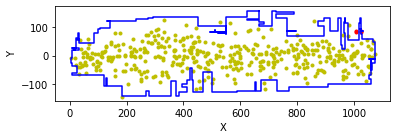

Input points seem to be invalid...
Input points seem to be invalid...
Input points seem to be invalid...
Input points seem to be invalid...


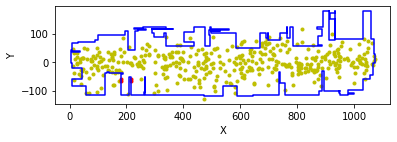

Input points seem to be invalid...
Input points seem to be invalid...


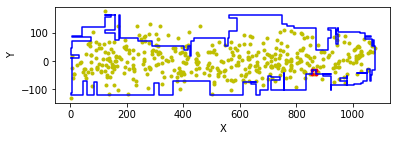

Input points seem to be invalid...
Input points seem to be invalid...


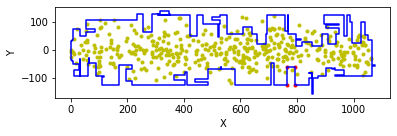

Input points seem to be invalid...


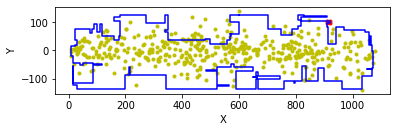

Input points seem to be invalid...
Input points seem to be invalid...
Input points seem to be invalid...
Input points seem to be invalid...


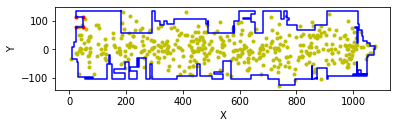

Input points seem to be invalid...
Input points seem to be invalid...


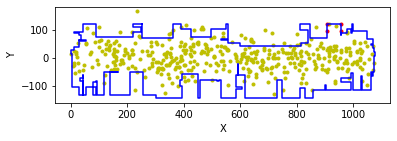

Input points seem to be invalid...
Input points seem to be invalid...
Input points seem to be invalid...


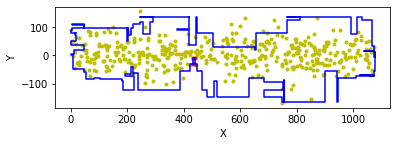

Input points seem to be invalid...
Input points seem to be invalid...
Input points seem to be invalid...
Input points seem to be invalid...
Input points seem to be invalid...


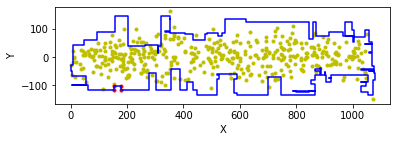

Input points seem to be invalid...
Input points seem to be invalid...
Input points seem to be invalid...


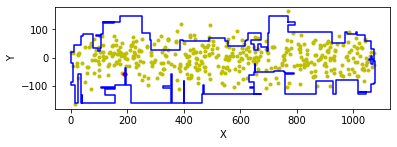

Input points seem to be invalid...
Input points seem to be invalid...


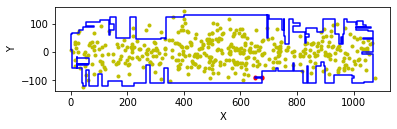

Input points seem to be invalid...
Input points seem to be invalid...
Input points seem to be invalid...


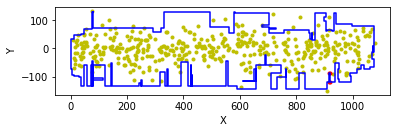

Input points seem to be invalid...
Input points seem to be invalid...


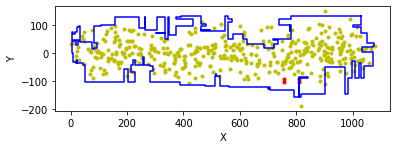

Input points seem to be invalid...
Input points seem to be invalid...
Input points seem to be invalid...
Input points seem to be invalid...


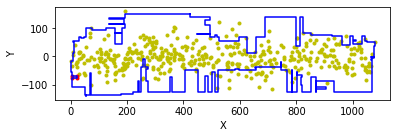

Input points seem to be invalid...
Input points seem to be invalid...
Input points seem to be invalid...
Input points seem to be invalid...


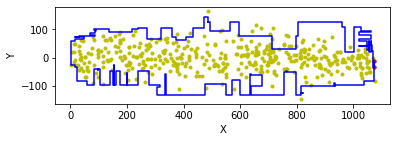

Input points seem to be invalid...


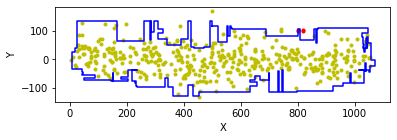

Input points seem to be invalid...
Input points seem to be invalid...
Input points seem to be invalid...


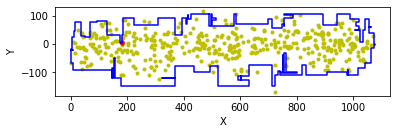

Input points seem to be invalid...


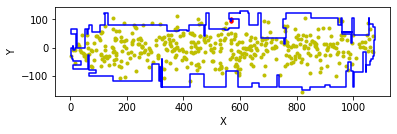

Input points seem to be invalid...


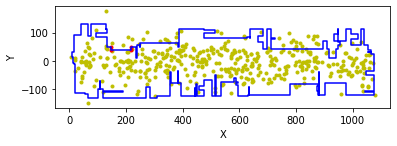

Input points seem to be invalid...
Input points seem to be invalid...
Input points seem to be invalid...


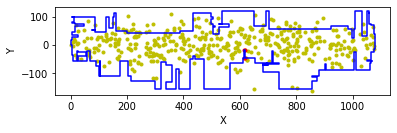

In [18]:
number_of_files = 20
input_folder = Path("Input/Horizontal")
for i in range(number_of_files):
    input_file_name = input_folder / (str(i) + ".csv")
    input_graph_name = input_folder / (str(i) + ".png")
    input_graph_name_fill = input_folder / (str(i) + "_fill.png")
    input_points = []
    for _ in range(500):
        x = random.uniform(0, 1080)
        y = calculate_y(x)
        point = (int(x), int(y))
        input_points.append(point)
    processed_points = convexOQHNew.findOrthogonalConvexHull(input_points)
    processed_points.append(processed_points[0])
    S = points_supplement(processed_points)    
    for i in range(len(S)):
        processed_points.insert(S[i][0]+i, S[i][1])
    processed_points = redundancy_omission(processed_points)
    processed_points, deleted_points = tarjan(processed_points)
    inner_points = []
    for point in input_points:
        if point not in processed_points:
            inner_points.append(point)
    concave_points_supplement(processed_points, inner_points, 50)
    processed_points.append(processed_points[0])
    with open(input_file_name, "w") as input_file:
        for point in processed_points:
            input_file.write(str(point[0]) + ", " + str(point[1]) + "\n")
        input_file.close()

    for point in deleted_points:
        input_points.remove(point)
    
    graph([processed_points],
            style=['b-'], 
            scale=1)
    plt.savefig(input_graph_name)
    plt.close()
    plt.clf()
    ax = plt.subplot()
    plt.fill_between([point[0] for point in processed_points],
                     [point[1] for point in processed_points], color='black',
                     interpolate = False)
    ax.set_aspect(1)
    plt.savefig(input_graph_name_fill)
    plt.close()

In [ ]:
inner_points = []

for point in input_points:
    if point not in processed_points:
        inner_points.append(point)
concave_points_supplement(processed_points, inner_points, 300)
processed_points.append(processed_points[0])
plt.clf()
ax = plt.subplot()
fig = plt.fill_between([point[0] for point in processed_points],
                       [point[1] for point in processed_points], 0, color='blue',
                      interpolate = False)
ax.set_aspect(1)
plt.show()
plt.clf()
processed_points_new = convexOQHNew.findOrthogonalConvexHull(processed_points)
processed_points_new.append(processed_points_new[0])
S = points_supplement(processed_points_new)    
for i in range(len(S)):
    processed_points_new.insert(S[i][0]+i, S[i][1])
processed_points_new = redundancy_omission(processed_points_new)
processed_points_new, deleted_points = tarjan(processed_points_new)

for point in deleted_points:
    input_points.remove(point)
    
graph([input_points, processed_points_new, processed_points_new],
      style=['y.', 'r.', 'b-'], 
      scale=1)
plt.show()
plt.clf()
ax = plt.subplot()
fig = plt.fill_between([point[0] for point in processed_points_new],
                       [point[1] for point in processed_points_new], 0, color='blue',
                      interpolate = False)
ax.set_aspect(1)
plt.show()s

In [ ]:
def generatePolygon( ctrX, ctrY, aveRadius, irregularity, spikeyness, numVerts ) :
    '''Start with the centre of the polygon at ctrX, ctrY, 
    then creates the polygon by sampling points on a circle around the centre. 
    Randon noise is added by varying the angular spacing between sequential points,
    and by varying the radial distance of each point from the centre.

    Params:
    ctrX, ctrY - coordinates of the "centre" of the polygon
    aveRadius - in px, the average radius of this polygon, this roughly controls how large the polygon is, really only useful for order of magnitude.
    irregularity - [0,1] indicating how much variance there is in the angular spacing of vertices. [0,1] will map to [0, 2pi/numberOfVerts]
    spikeyness - [0,1] indicating how much variance there is in each vertex from the circle of radius aveRadius. [0,1] will map to [0, aveRadius]
    numVerts - self-explanatory

    Returns a list of vertices, in CCW order.
    '''

    irregularity = clip( irregularity, 0,1 ) * 2*math.pi / numVerts
    spikeyness = clip( spikeyness, 0,1 ) * aveRadius

    # generate n angle steps
    angleSteps = []
    lower = (2*math.pi / numVerts) - irregularity
    upper = (2*math.pi / numVerts) + irregularity
    sum = 0
    for i in range(numVerts) :
        tmp = random.uniform(lower, upper)
        angleSteps.append( tmp )
        sum = sum + tmp

    # normalize the steps so that point 0 and point n+1 are the same
    k = sum / (2*math.pi)
    for i in range(numVerts) :
        angleSteps[i] = angleSteps[i] / k

    # now generate the points
    points = []
    angle = random.uniform(0, 2*math.pi)
    for i in range(numVerts) :
        r_i = clip( random.gauss(aveRadius, spikeyness), 0, 2*aveRadius )
        x = ctrX + r_i*math.cos(angle)
        y = ctrY + r_i*math.sin(angle)
        points.append( (int(x),int(y)) )

        angle = angle + angleSteps[i]

    return points

def clip(x, min, max):
    if min > max:      return x    
    elif( x < min ) :  return min
    elif( x > max ) :  return max
    else :             return x

In [ ]:
# input_points = []
# input_image = []
# for _ in range(1080):
#     tmp_lst = []
#     for _ in range(720):
#         tmp_lst.append(random.choices([0, 1], weights=[999,1])[0])
#     input_image.append(tmp_lst)
# # for row in input_image:
# #     print(row)
    
# for i in range(1080):
#     for j in range(720):
#         if input_image[i][j] == 1:
#             input_points.append((i,j))
# processed_points = convexOQHNew.findOrthogonalConvexHull(input_points)
# processed_points.append(processed_points[0])
# S = points_supplement(processed_points)    
# for i in range(len(S)):
#     processed_points.insert(S[i][0]+i, S[i][1])
# processed_points = redundancy_omission(processed_points)
# # for point in processed_points:
# #     print(point)
# graph(processed_points, input_points, 1)
# plt.show()
# plt.clf()
# processed_points = tarjan(processed_points)
# graph(processed_points, input_points, 1)
# plt.show()